In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from typing import List, Tuple

In [2]:
import json

with open("narrative_questions.json") as f:
    data = json.load(f)
Q = data.values()
K = []
for q in Q:
    choice = q["choices"].values()
    K.append(len(choice))

In [3]:
# get the file name that starts with "QnA"
import os
import re

file_list = os.listdir(".")
file_list.sort()
file_list = [f for f in file_list if re.match(r"^narrative_QnA", f)]
# save the file list to csv file:
import pandas as pd

df = pd.DataFrame(file_list, columns=["file_name"])
df.to_csv("Narrative_QnA_file_list.csv", index=False)
file_list

['narrative_QnA_summary_Russo_Ukrainian_War_eng.json',
 'narrative_QnA_summary_Russo_Ukrainian_War_zho.json']

In [4]:
import json
import numpy as np


def extract_answers(file):
    with open(file) as f:
        data = json.load(f)

    # Initialize a list to store the extracted values
    answers = []

    # Iterate through the JSON objects to extract `post_LLM_answer`
    for item in data:

        if "answers" in item:
            # get the value under the key `answers`
            answer = item["answers"]
            answers.append(list(answer.values()))
    for a in answers:
        print(a)
    # convert the list of extracted values to a numpy array
    answers = np.array(answers, dtype=object)

    # answers = np.where(answers == ".", 0, answers)
    # find the answer that is "."
    # idx = np.where(answers == ".")
    # idx = list(zip(*idx))
    # answers = answers.astype(int)
    return answers

In [5]:
answers = []
for file in file_list:
    answer = extract_answers(file)
    answers.append(answer)
answers = np.array(answers)

# reshape answers to 600,80
answers = answers.reshape(200, len(K))
answers.max()

['A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A']
['B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A']
['B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'A', 'C', 'B', 'B', 'A', 'A

'C'

In [6]:
print(K)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [9]:
N = len(K)  # Number of questions

M = answers.shape[0]  # Number of articles

In [10]:
N, M

(11, 200)

In [11]:
# count the number of 0,1,2,3,4 in each question
for i in range(answers.shape[1]):
    print(f"Question {i+1}")
    print(np.unique(answers[:, i], return_counts=True))

Question 1
(array(['A', 'B', 'C'], dtype=object), array([ 32,  26, 142]))
Question 2
(array(['A', 'B', 'C'], dtype=object), array([ 38,  24, 138]))
Question 3
(array(['A', 'B', 'C'], dtype=object), array([ 31,  26, 143]))
Question 4
(array(['A', 'B', 'C'], dtype=object), array([ 41,  16, 143]))
Question 5
(array(['A', 'B', 'C'], dtype=object), array([ 52,  20, 128]))
Question 6
(array(['A', 'B', 'C'], dtype=object), array([ 35,  26, 139]))
Question 7
(array(['A', 'B', 'C'], dtype=object), array([ 78,  21, 101]))
Question 8
(array(['A', 'B', 'C'], dtype=object), array([65, 36, 99]))
Question 9
(array(['A', 'B', 'C'], dtype=object), array([90, 15, 95]))
Question 10
(array(['A', 'B', 'C'], dtype=object), array([92, 13, 95]))
Question 11
(array(['A', 'B', 'C'], dtype=object), array([98, 17, 85]))


In [12]:
import pandas as pd

# read the label file
labels = pd.read_csv("../CA/labels_4o.csv", header=None, names=["label"])
labels = labels.astype(int)

In [13]:
# get the label index if labe is 1
label_index = list(labels[labels["label"] == 1].index)

In [14]:
label_index

[1,
 2,
 3,
 5,
 10,
 13,
 16,
 20,
 25,
 28,
 31,
 33,
 46,
 48,
 53,
 56,
 61,
 62,
 63,
 65,
 68,
 69,
 73,
 79,
 87,
 91,
 103,
 104,
 105,
 106,
 111,
 112,
 114,
 116,
 117,
 118,
 124,
 130,
 133,
 143,
 145,
 153,
 155,
 158,
 159,
 160,
 161,
 162,
 165,
 178,
 185,
 191,
 192,
 193]

In [15]:
# split the label index into  smaller than 100 and larger than 100
label_index_eng = [i for i in label_index if i < 100]
label_index_zho = [i for i in label_index if i >= 100]

In [16]:
len(label_index_eng), len(label_index_zho)

(26, 28)

In [18]:
answers_eng = answers[label_index_eng]
answers_zho = answers[label_index_zho]
answers_eng.shape, answers_zho.shape

((26, 11), (28, 11))

In [19]:
answers_eng

array([['B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A'],
       ['B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A'],
       ['B', 'A', 'B', 'A', 'A', 'A', 'A

In [20]:
# count the number of 0,1,2 in answers_eng by axis 0
for i in range(answers_eng.shape[1]):
    print(f"Question {i+1}")
    print(np.unique(answers_eng[:, i], return_counts=True))

Question 1
(array(['A', 'B', 'C'], dtype=object), array([14,  8,  4]))
Question 2
(array(['A', 'B', 'C'], dtype=object), array([18,  4,  4]))
Question 3
(array(['A', 'B', 'C'], dtype=object), array([14,  8,  4]))
Question 4
(array(['A', 'B', 'C'], dtype=object), array([21,  1,  4]))
Question 5
(array(['A', 'B', 'C'], dtype=object), array([21,  1,  4]))
Question 6
(array(['A', 'B', 'C'], dtype=object), array([17,  5,  4]))
Question 7
(array(['A', 'B', 'C'], dtype=object), array([21,  4,  1]))
Question 8
(array(['A', 'B', 'C'], dtype=object), array([20,  5,  1]))
Question 9
(array(['A', 'B', 'C'], dtype=object), array([23,  2,  1]))
Question 10
(array(['A', 'C'], dtype=object), array([25,  1]))
Question 11
(array(['A', 'B', 'C'], dtype=object), array([22,  3,  1]))


In [21]:
# count the number of 0,1,2 in answers_eng by axis 0
for i in range(answers_zho.shape[1]):
    print(f"Question {i+1}")
    print(np.unique(answers_zho[:, i], return_counts=True))

Question 1
(array(['A', 'B', 'C'], dtype=object), array([12, 10,  6]))
Question 2
(array(['A', 'B', 'C'], dtype=object), array([15, 11,  2]))
Question 3
(array(['A', 'B', 'C'], dtype=object), array([12, 10,  6]))
Question 4
(array(['A', 'B', 'C'], dtype=object), array([15,  7,  6]))
Question 5
(array(['A', 'B', 'C'], dtype=object), array([18,  4,  6]))
Question 6
(array(['A', 'B', 'C'], dtype=object), array([12, 11,  5]))
Question 7
(array(['A', 'B', 'C'], dtype=object), array([20,  6,  2]))
Question 8
(array(['A', 'B', 'C'], dtype=object), array([17,  9,  2]))
Question 9
(array(['A', 'B', 'C'], dtype=object), array([21,  5,  2]))
Question 10
(array(['A', 'B', 'C'], dtype=object), array([21,  5,  2]))
Question 11
(array(['A', 'B', 'C'], dtype=object), array([20,  6,  2]))


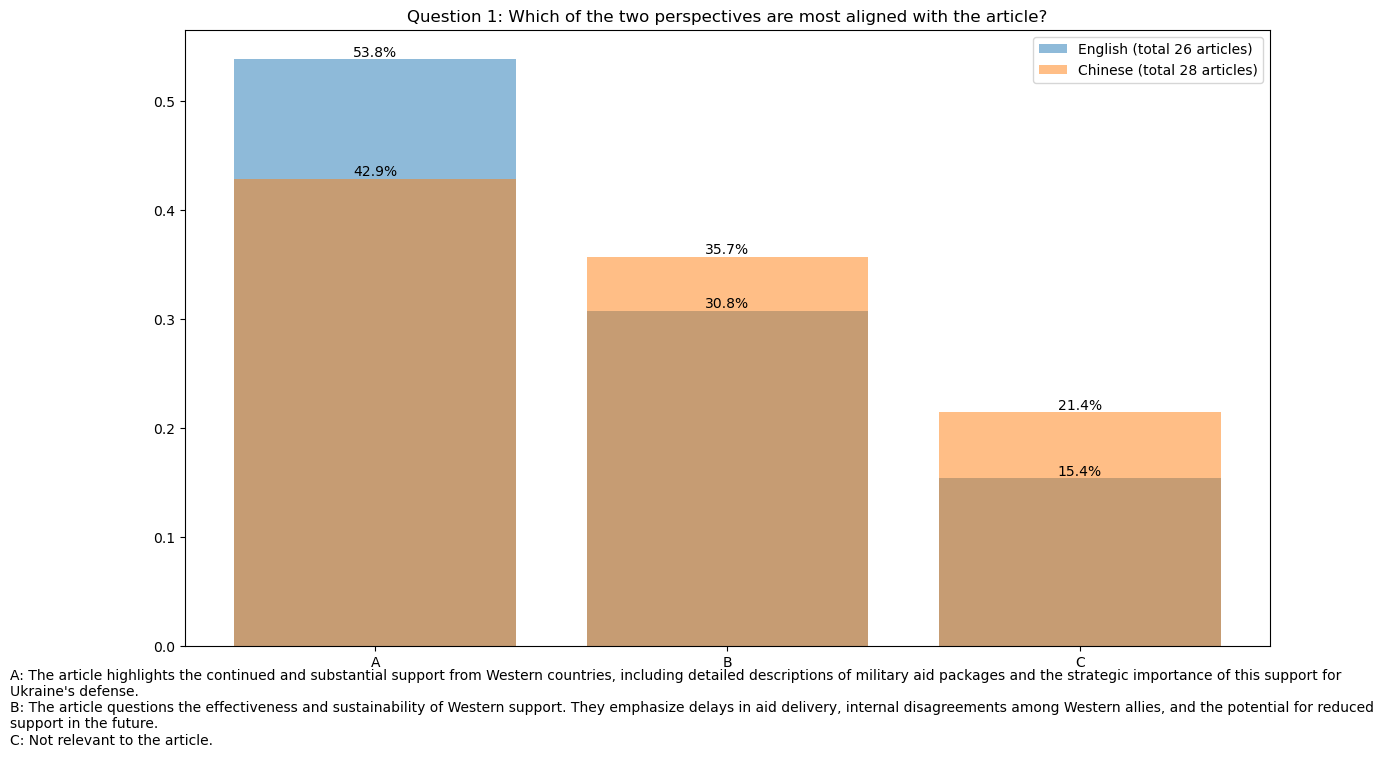

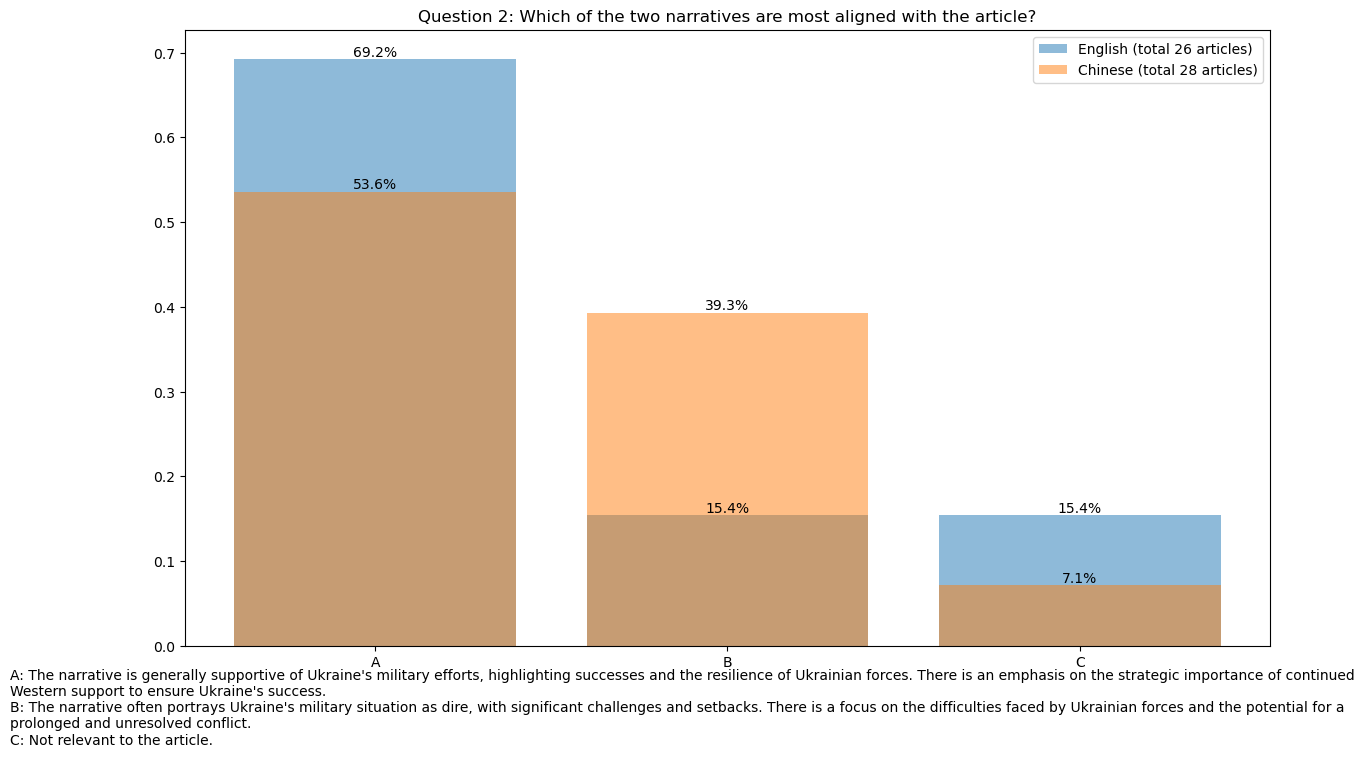

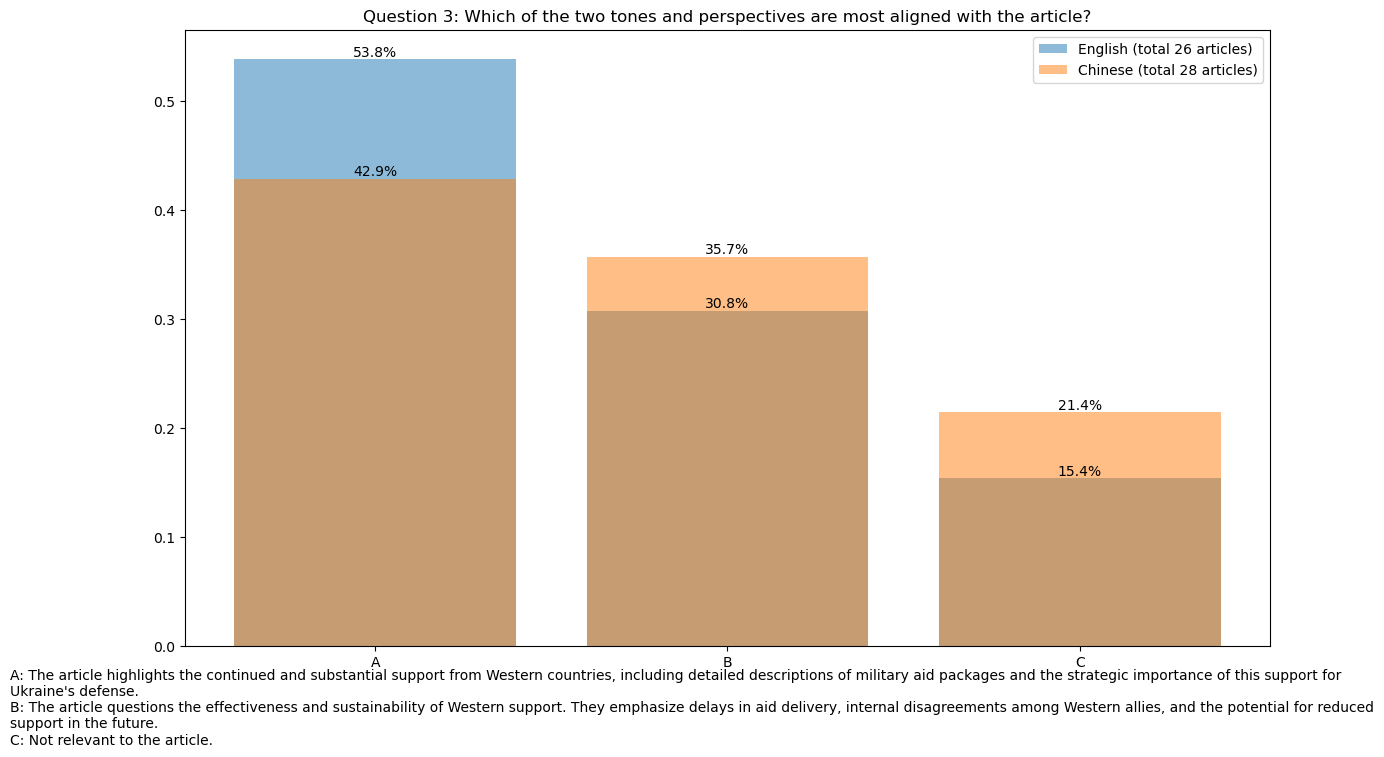

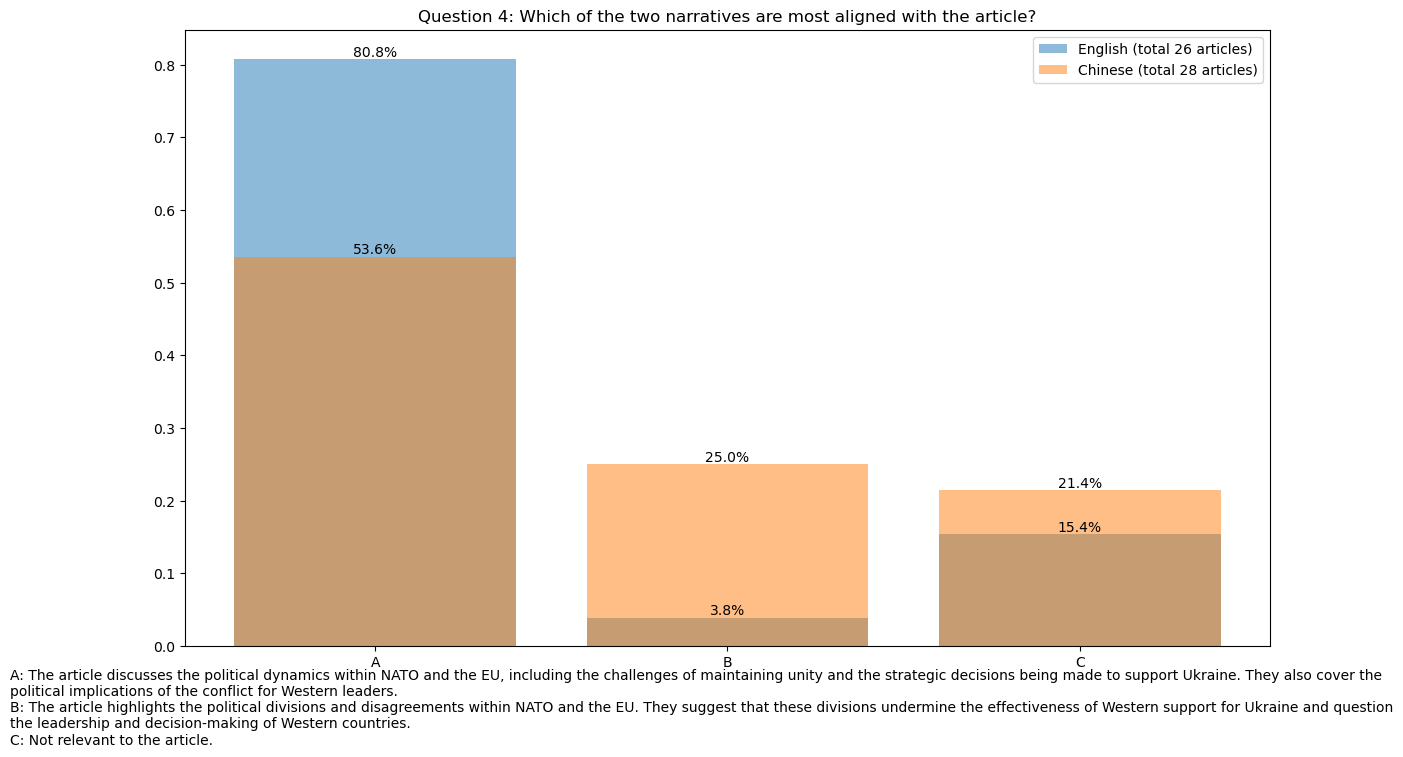

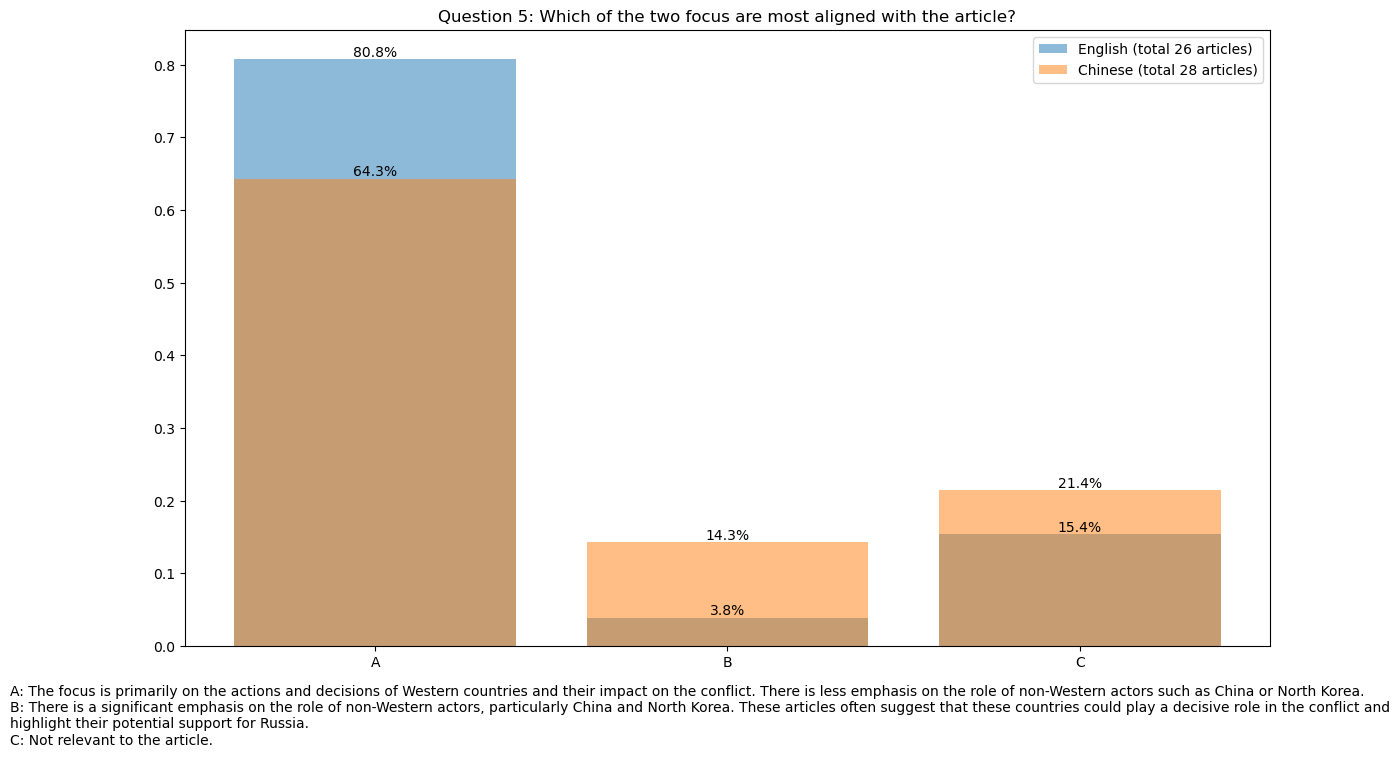

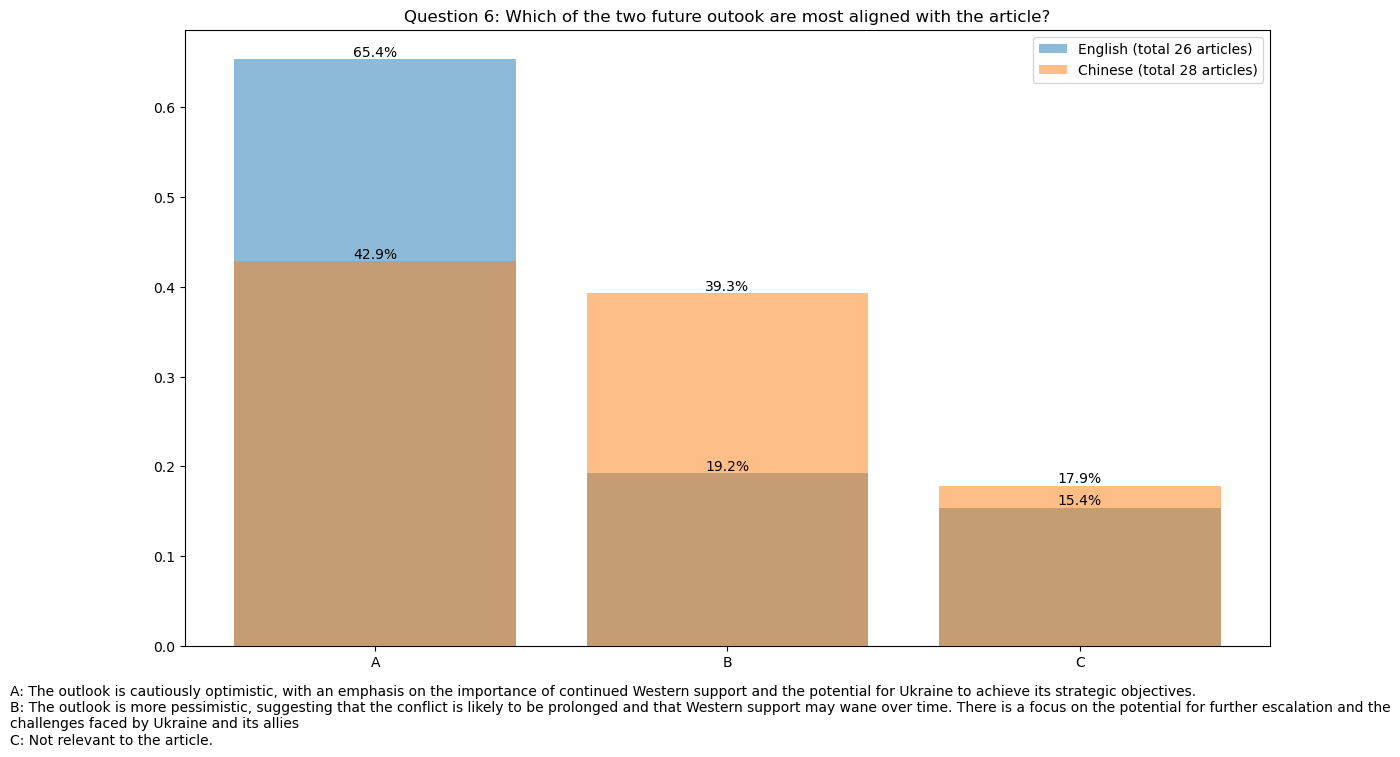

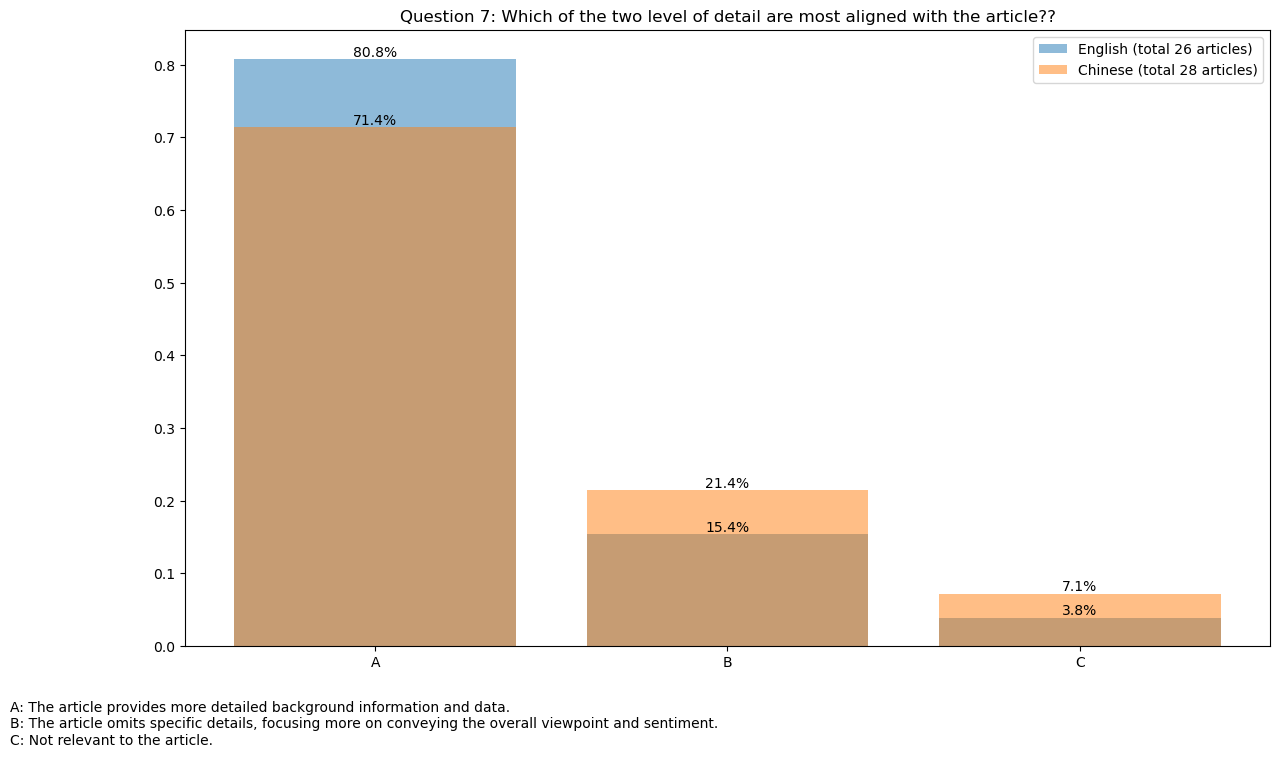

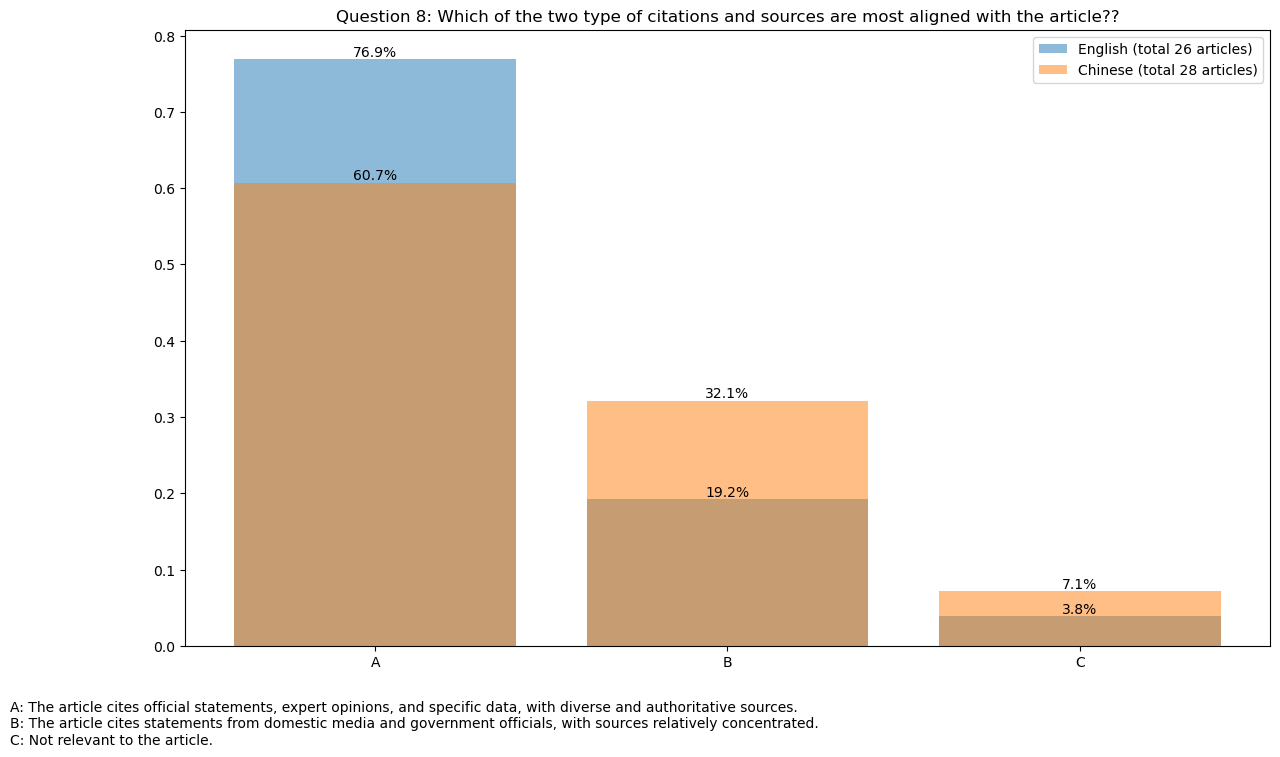

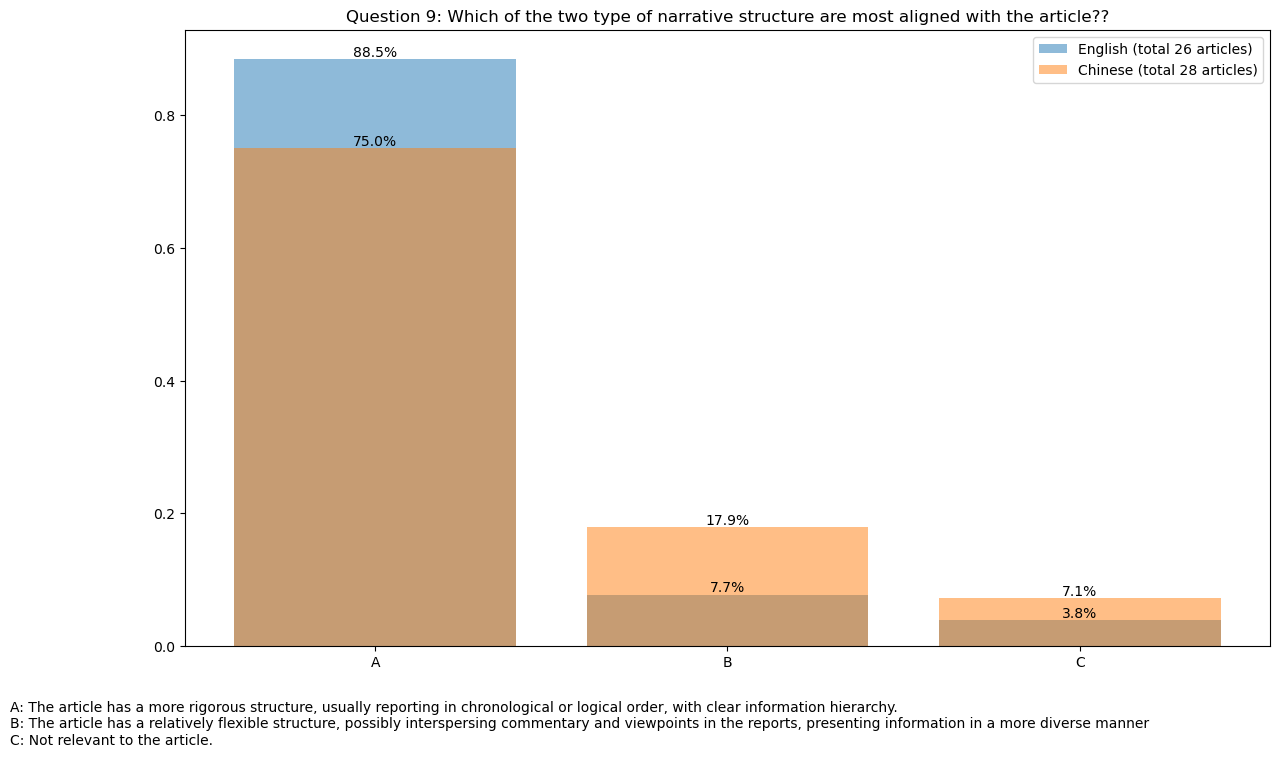

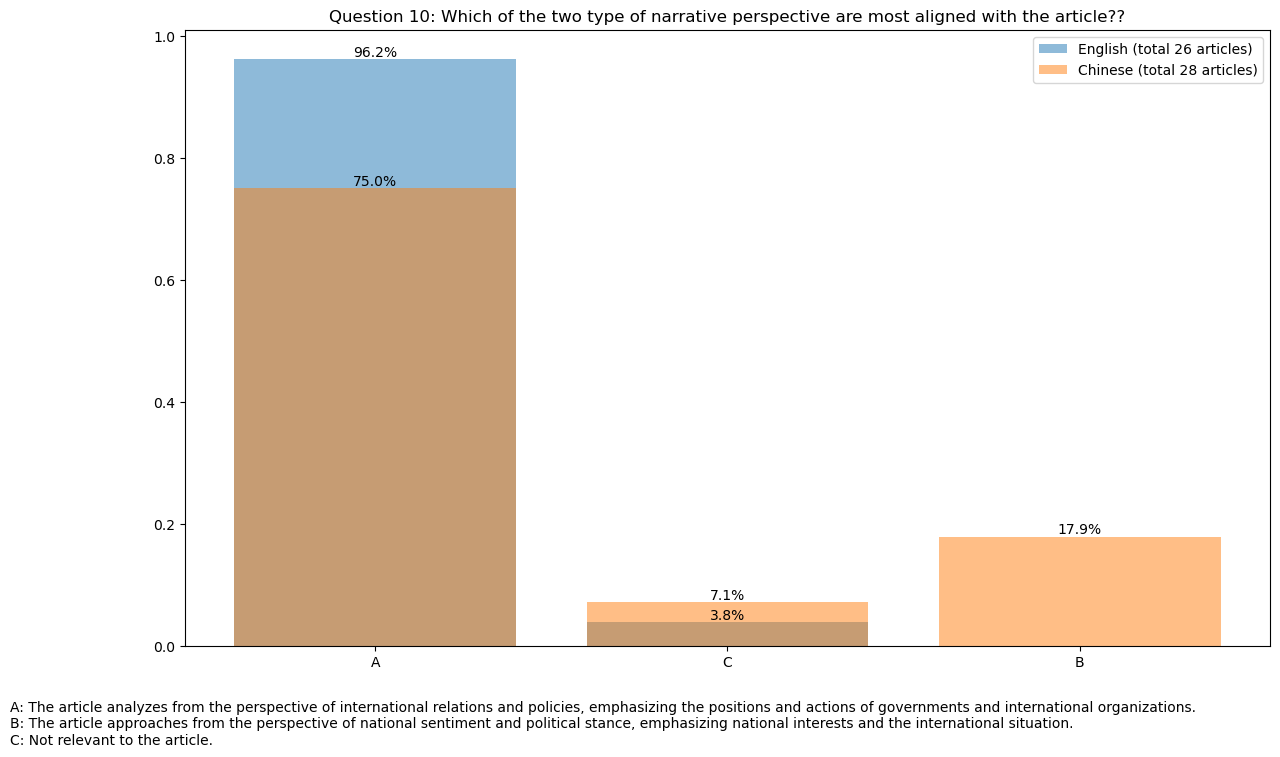

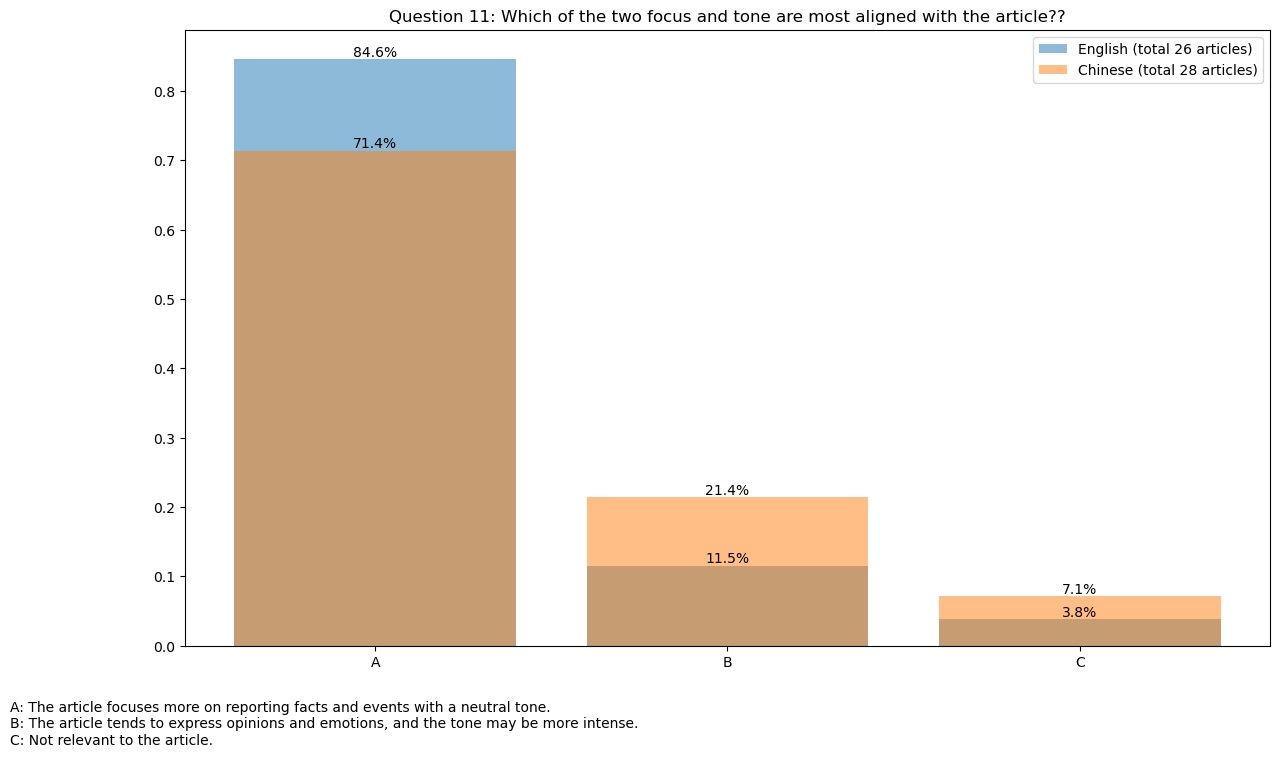

In [57]:
# read the questions from the json file
with open("narrative_questions.json") as f:
    q = json.load(f)

# plot the distribution of answers
import matplotlib.pyplot as plt

for i in range(answers_eng.shape[1]):
    unique_values_eng, counts_eng = np.unique(answers_eng[:, i], return_counts=True)
    percentages_eng = counts_eng / len(label_index_eng)

    unique_values_zho, counts_zho = np.unique(answers_zho[:, i], return_counts=True)
    percentages_zho = counts_zho / len(label_index_zho)
    # set the fig size
    plt.figure(figsize=(14, 8))
    plt.bar(
        unique_values_eng,
        percentages_eng,
        label=f"English (total {len(label_index_eng)} articles)",
        alpha=0.5,
    )
    plt.bar(
        unique_values_zho,
        percentages_zho,
        label=f"Chinese (total {len(label_index_zho)} articles)",
        alpha=0.5,
    )

    # Add counts on top of the bars
    for x, y in zip(unique_values_eng, percentages_eng):
        plt.text(x, y, str(np.round(y * 100, 1)) + "%", ha="center", va="bottom")
    for x, y in zip(unique_values_zho, percentages_zho):
        plt.text(x, y, str(np.round(y * 100, 1)) + "%", ha="center", va="bottom")

    question = q[f"Q{i+1}"]["question"]
    answer = q[f"Q{i+1}"]["choices"]
    # reformat the answer
    answer = "\n".join([f"{k}: {v}" for k, v in answer.items()])

    plt.figtext(
        0.0, -0.01, f"{answer}", wrap=True, horizontalalignment="left", fontsize=10
    )
    plt.title(f"Question {i+1}: {question}")
    plt.legend()
    # plt.tight_layout()
    plt.show()

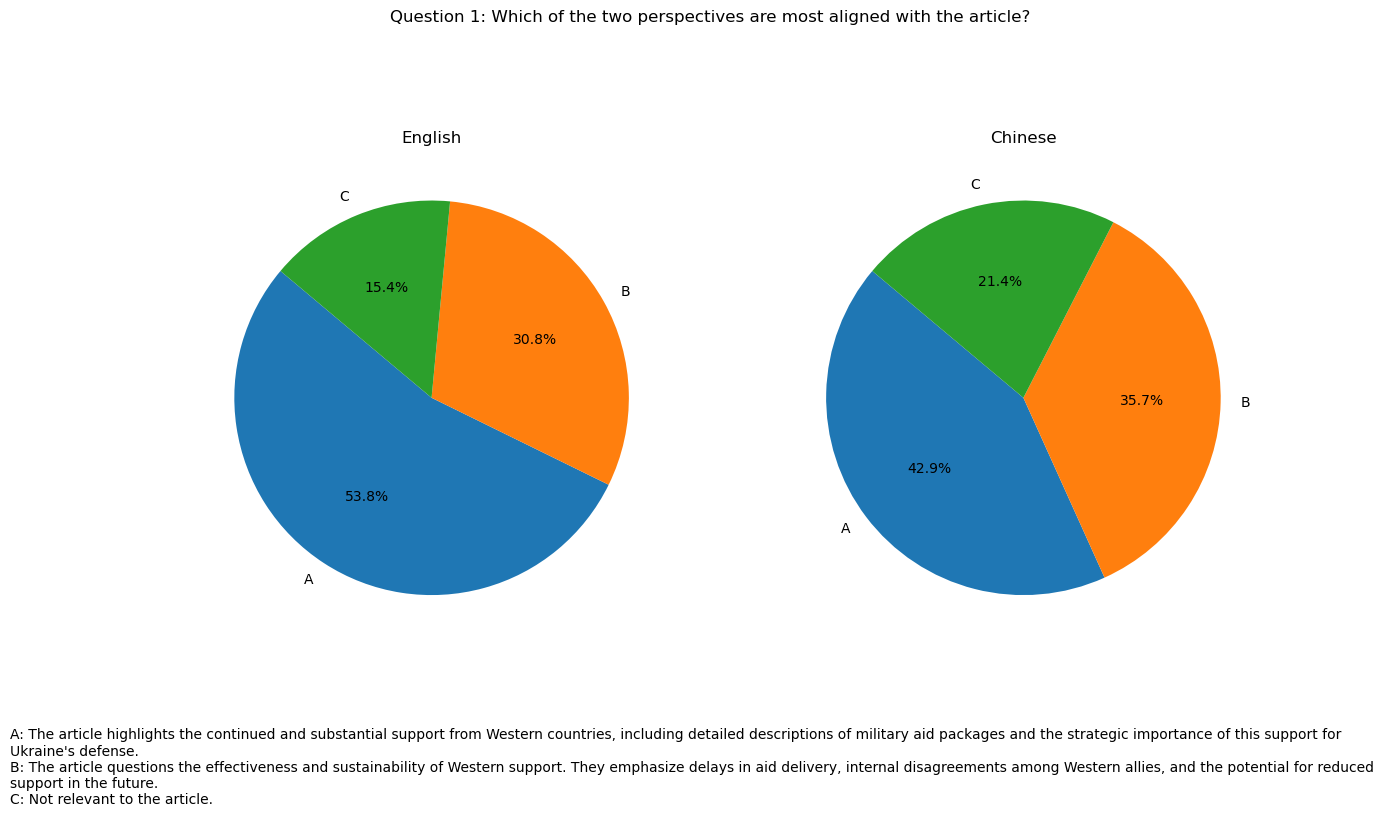

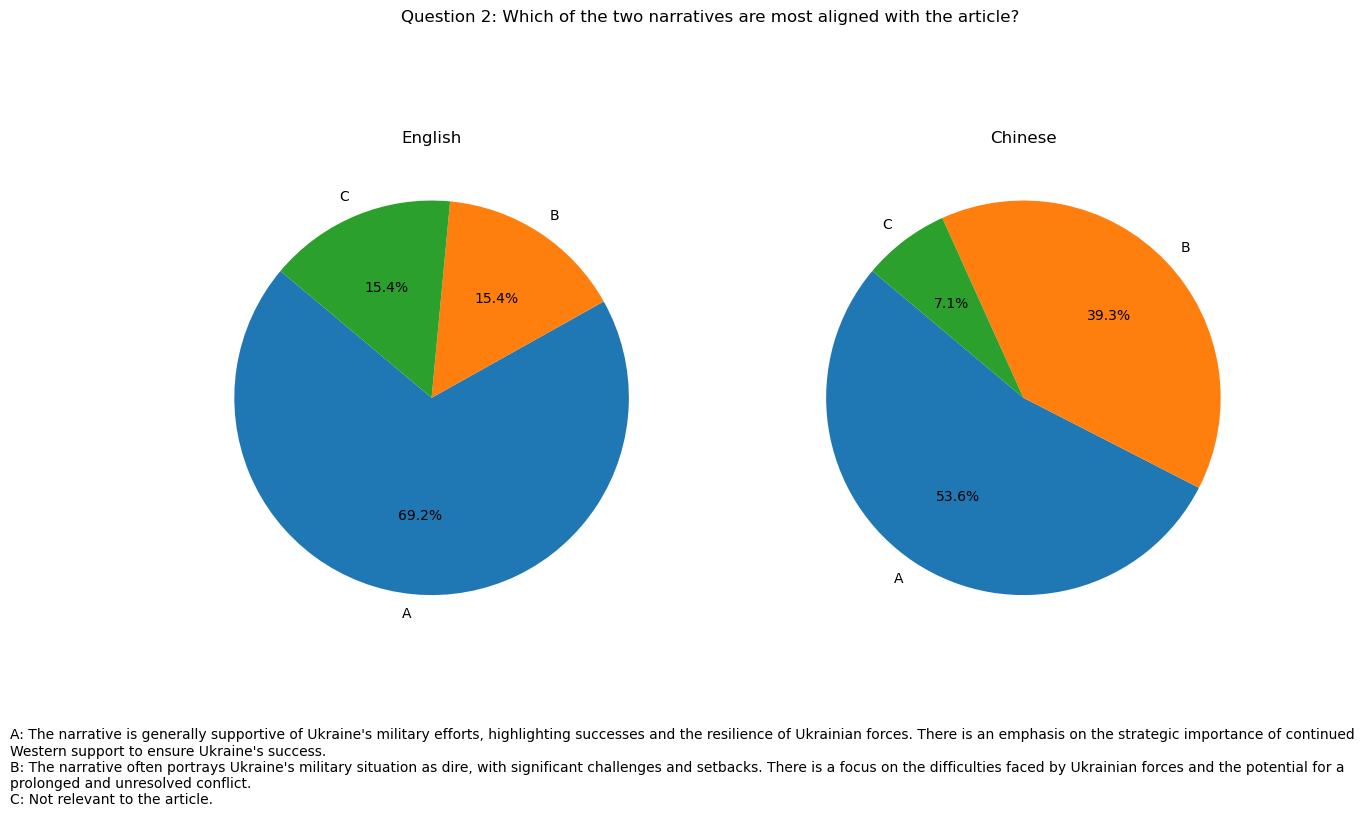

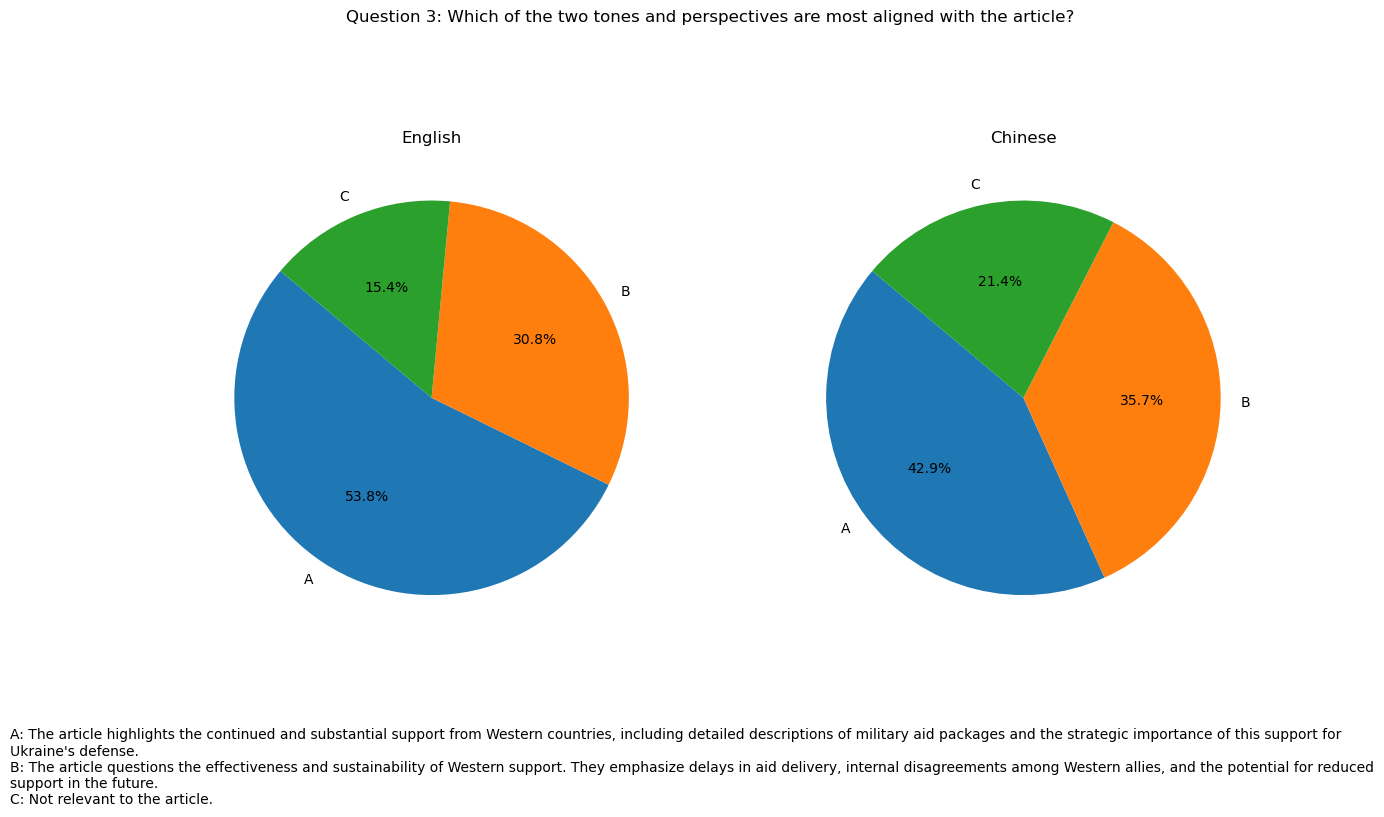

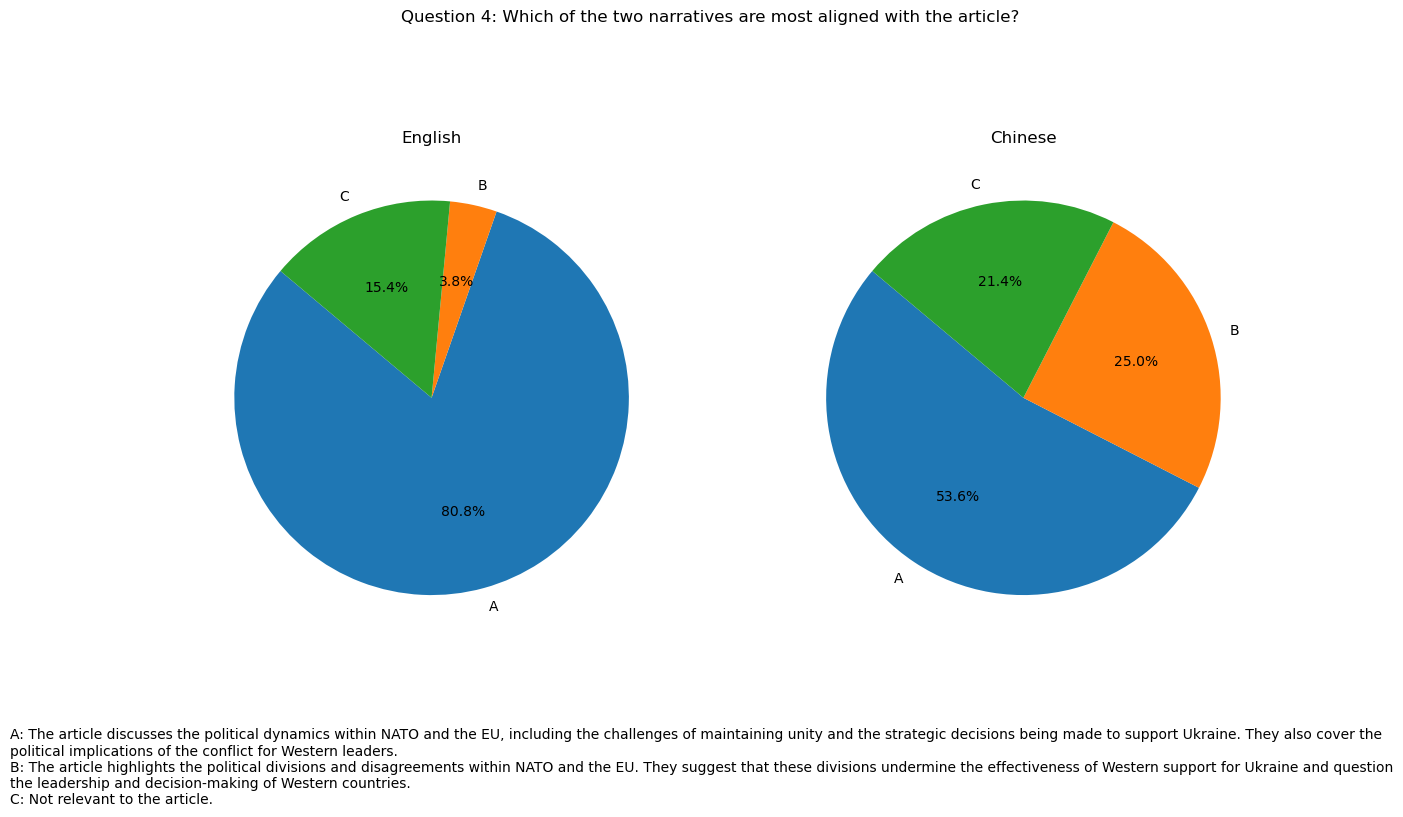

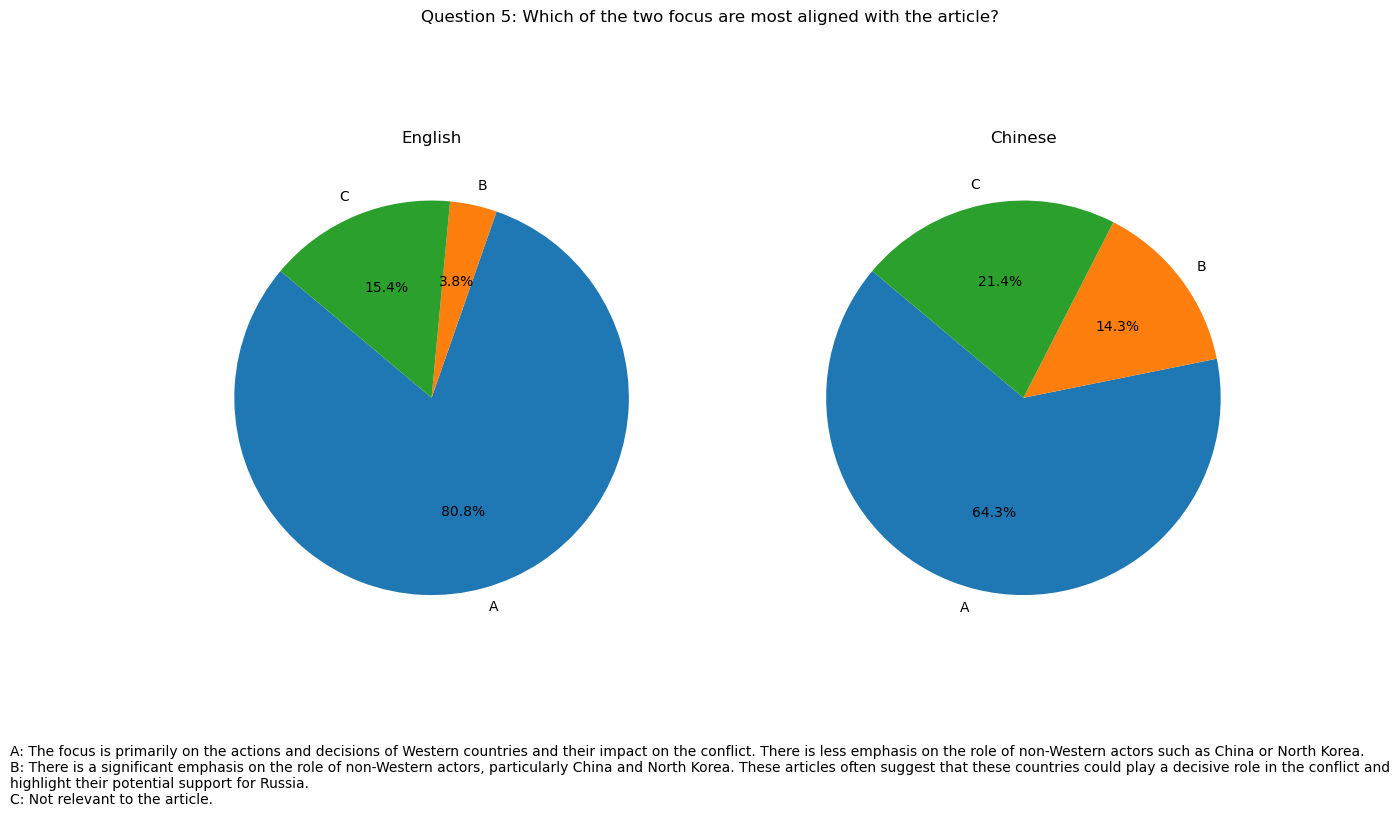

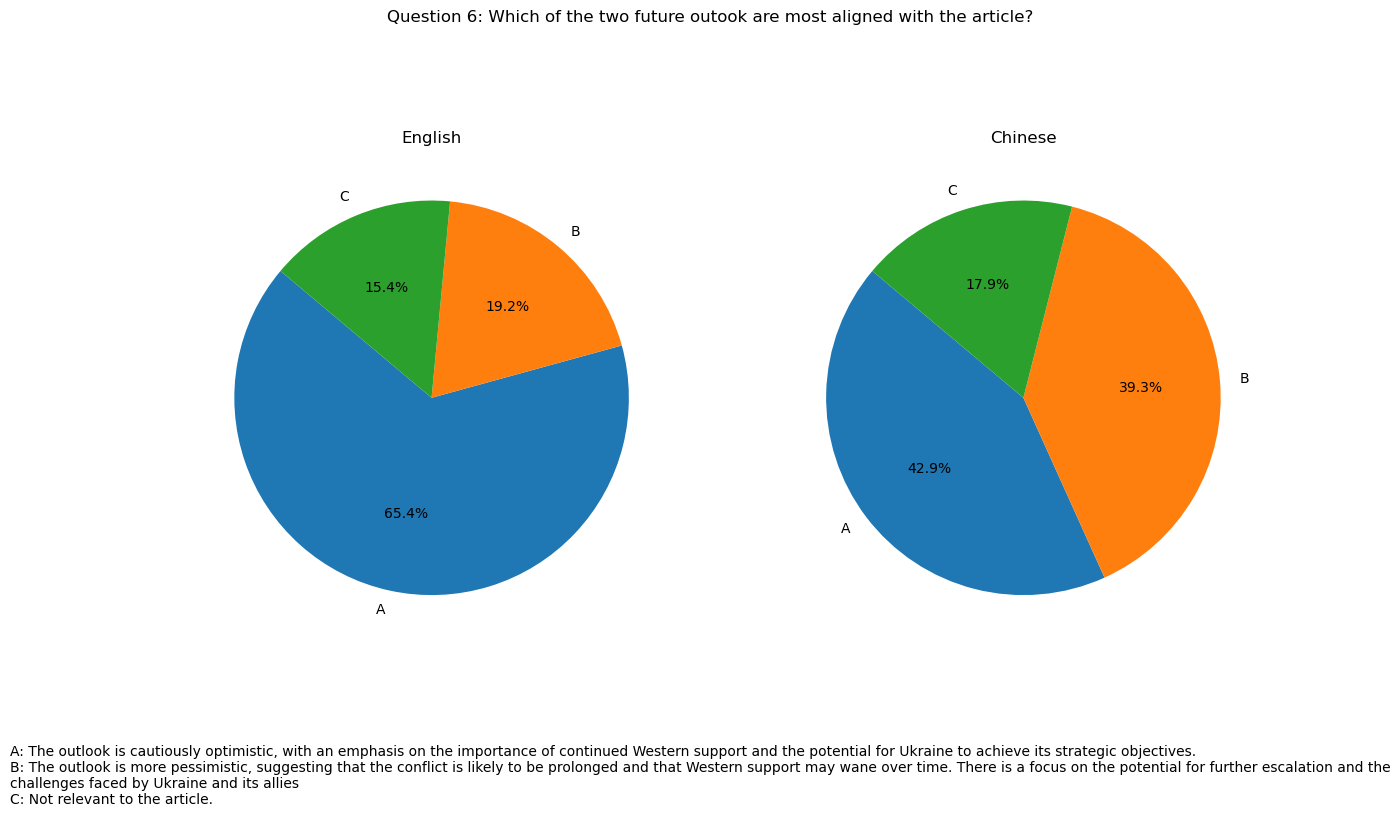

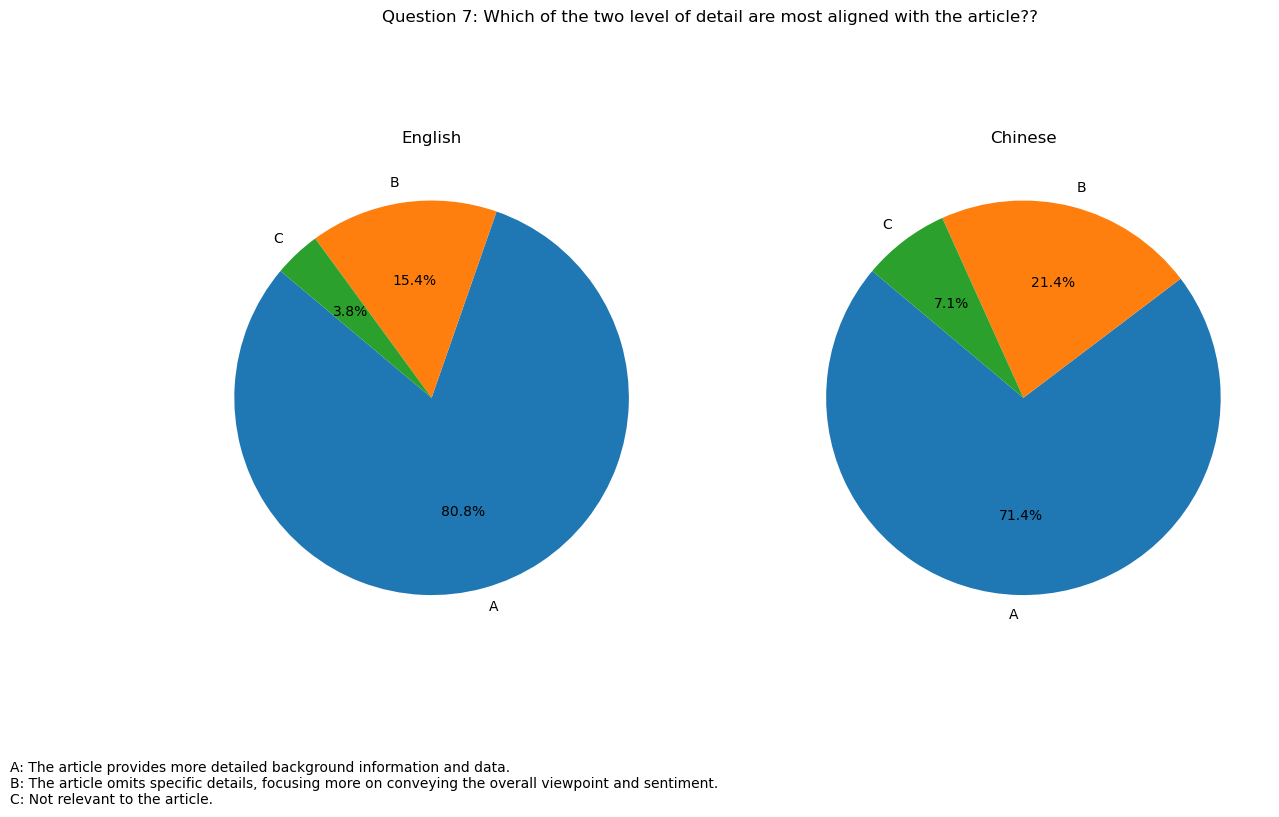

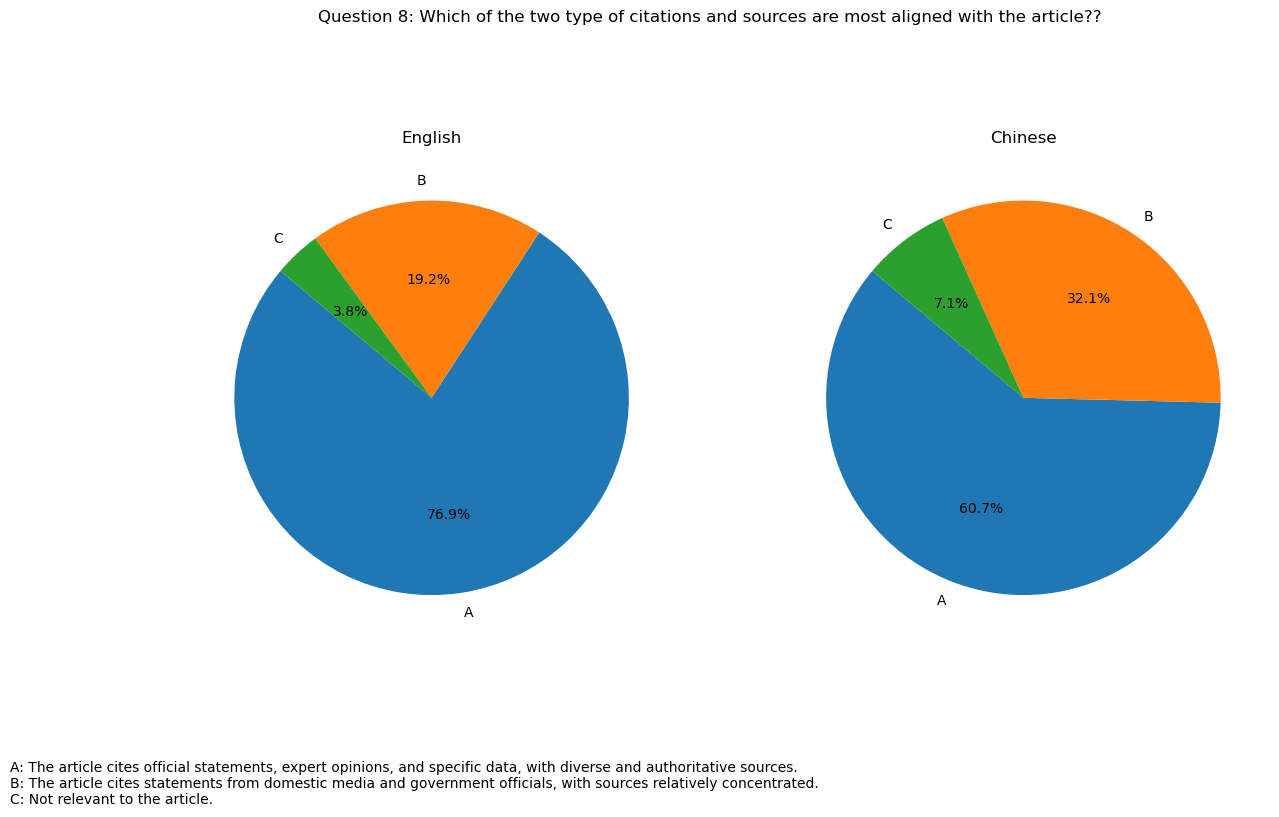

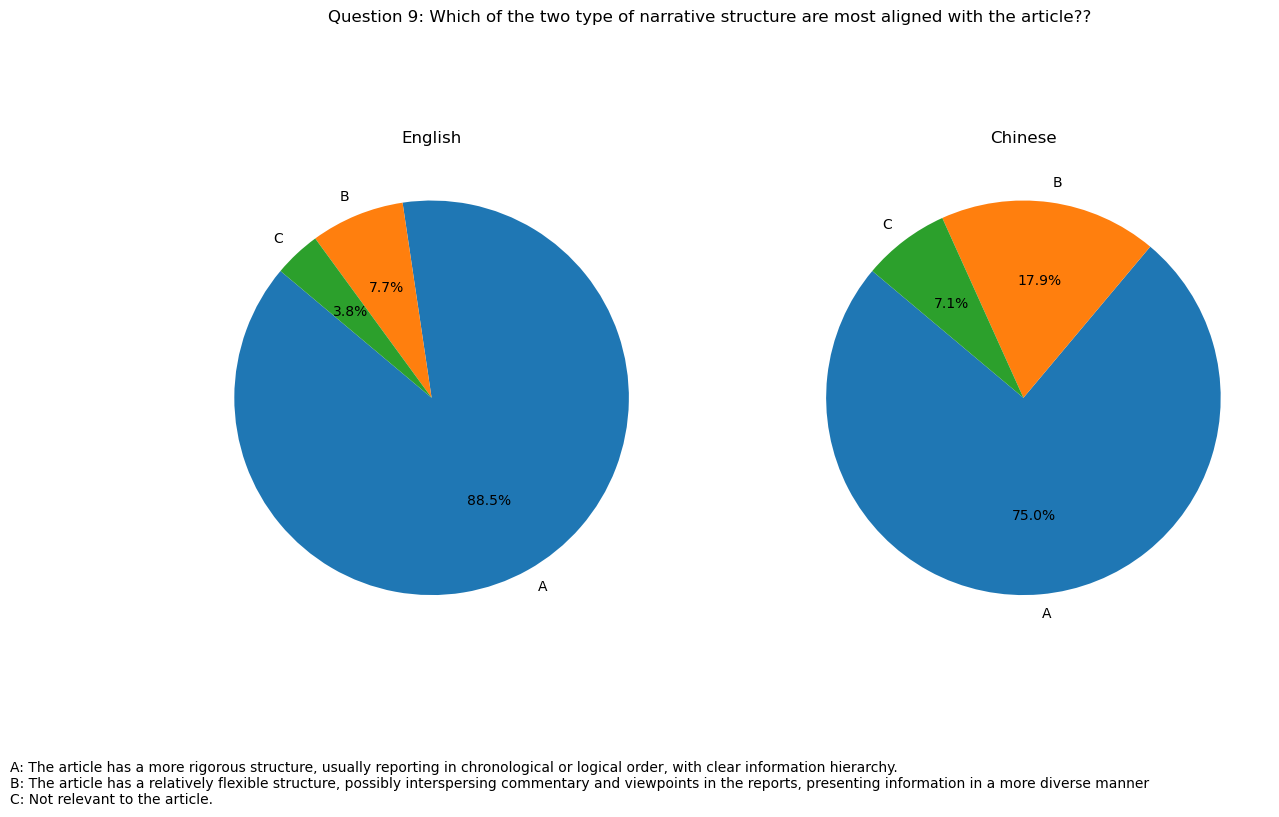

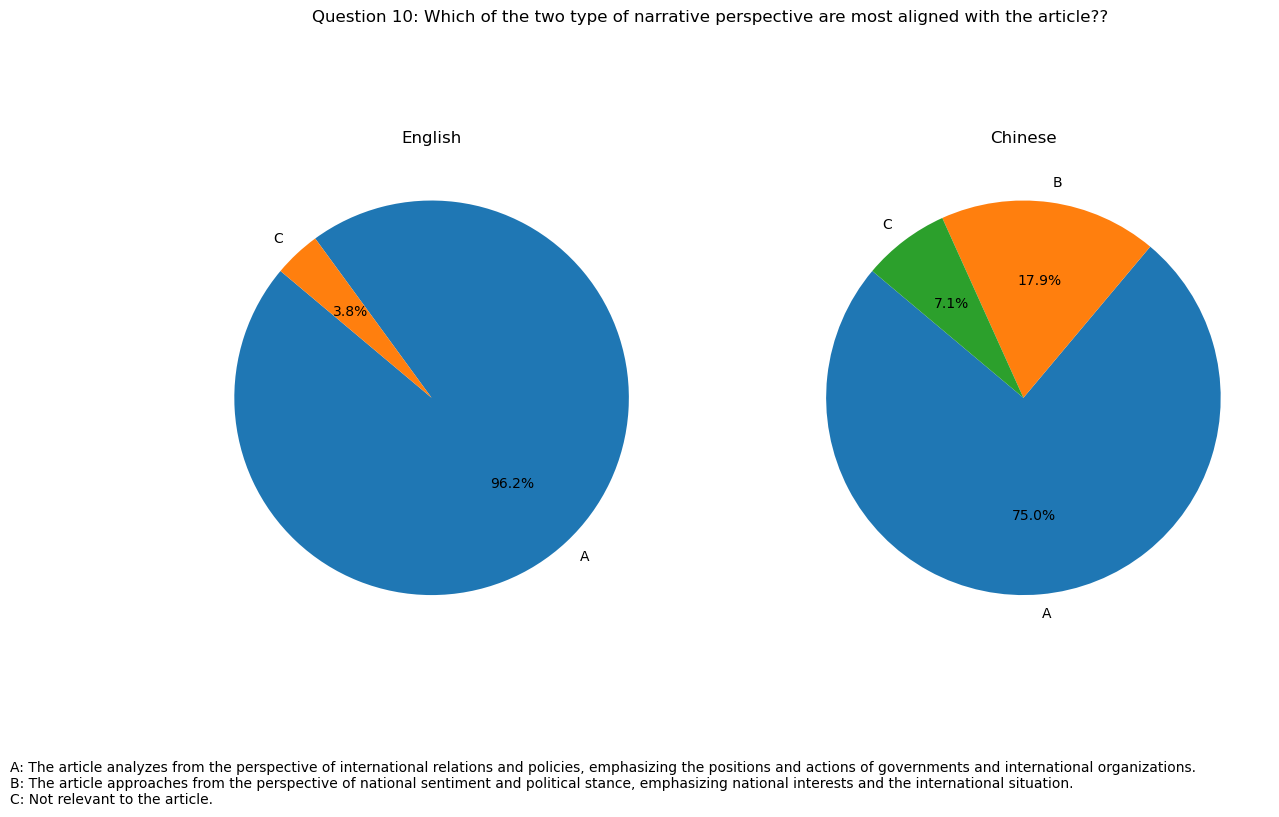

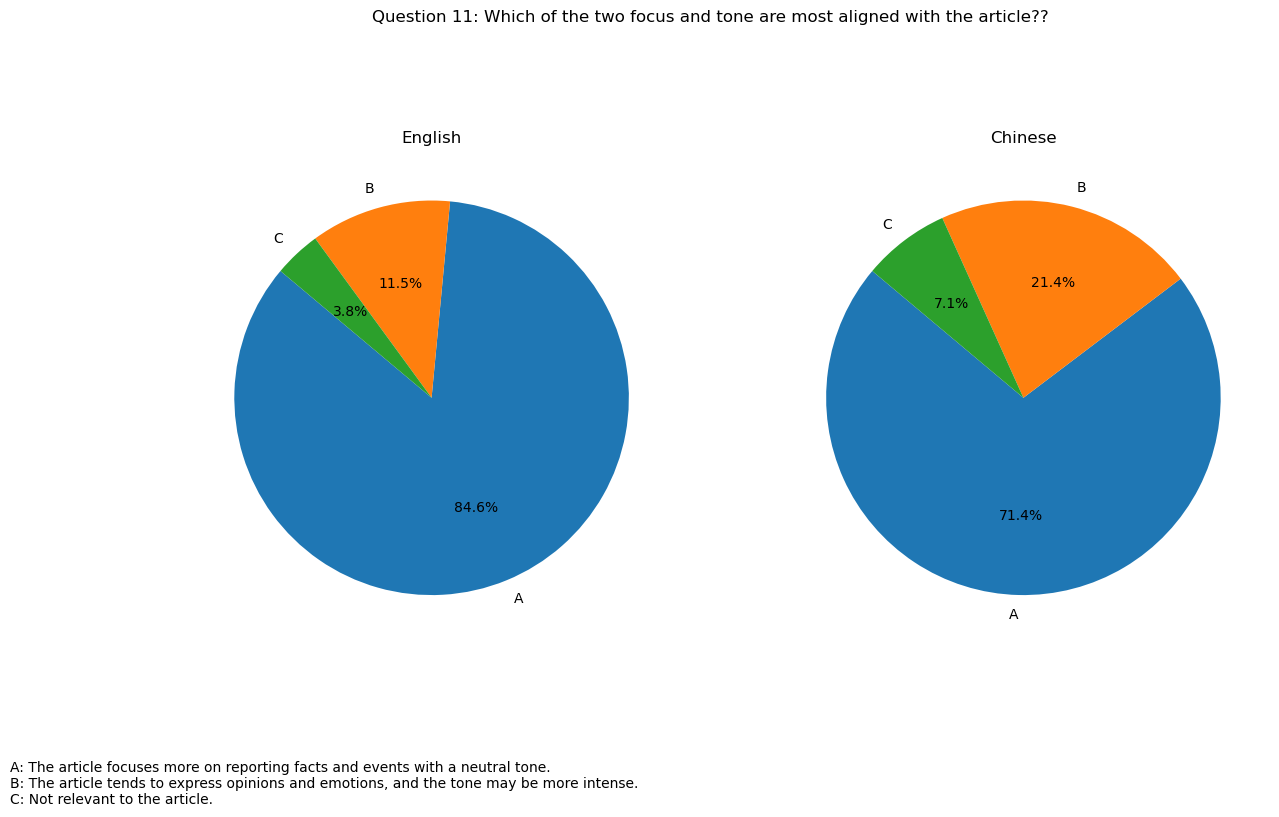

In [60]:
# read the questions from the json file
with open("narrative_questions.json") as f:
    q = json.load(f)

# plot the distribution of answers
import matplotlib.pyplot as plt

for i in range(answers_eng.shape[1]):
    unique_values_eng, counts_eng = np.unique(answers_eng[:, i], return_counts=True)
    percentages_eng = counts_eng / len(label_index_eng)

    unique_values_zho, counts_zho = np.unique(answers_zho[:, i], return_counts=True)
    percentages_zho = counts_zho / len(label_index_zho)

    # set the fig size
    fig, axs = plt.subplots(1, 2, figsize=(14, 8))

    # Create pie charts
    axs[0].pie(
        percentages_eng, labels=unique_values_eng, autopct="%1.1f%%", startangle=140
    )
    axs[0].set_title("English")

    axs[1].pie(
        percentages_zho, labels=unique_values_zho, autopct="%1.1f%%", startangle=140
    )
    axs[1].set_title("Chinese")

    question = q[f"Q{i+1}"]["question"]
    answer = q[f"Q{i+1}"]["choices"]
    # reformat the answer
    answer = "\n".join([f"{k}: {v}" for k, v in answer.items()])

    plt.figtext(
        0.0, -0.01, f"{answer}", wrap=True, horizontalalignment="left", fontsize=10
    )
    plt.suptitle(f"Question {i+1}: {question}")
    plt.show()